<a href="https://colab.research.google.com/github/rukendar/Rukendar.s/blob/main/Day_15_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB
None
       Patient_ID         Age  Blood_Pressure  Cholesterol
count  505.000000  505.000000      475.000000   485.000000
mean   249.693069   52.918812      133.412632   200.470103
std    144.240508   21.064700       25.933424    58.533857
min      1.000000   18.000000       90.000000   101.000000
25%    126.000000   34.000000      111.000000   149.000000
50%    249.000000   52.000000      132.000000   207.000000
75%    374

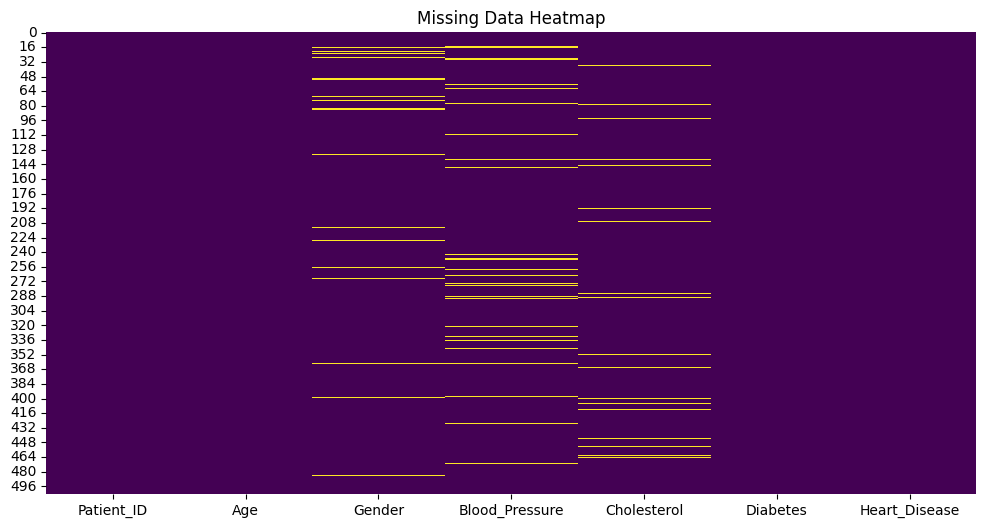

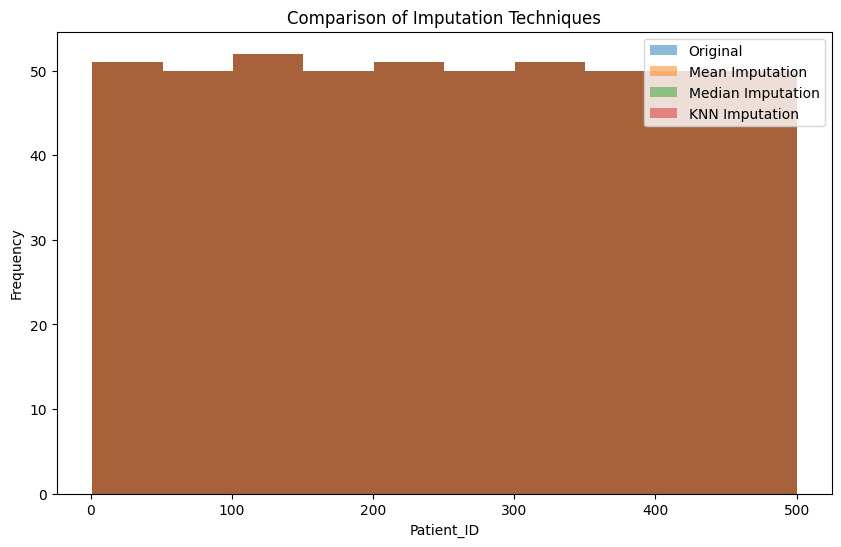

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression

try:
    df = pd.read_csv('/content/drive/MyDrive/Assignments_excelr/Day_15_Healthcare_Data.csv')
except FileNotFoundError:
    print("Error: 'healthcare_dataset.csv' not found. Please upload the dataset file.")
    df = pd.DataFrame()

if not df.empty:
    print(df.info())
    print(df.describe())

    missing_values = df.isna().sum()
    missing_percentage = (missing_values / len(df)) * 100
    print("Missing Values:\n", missing_values)
    print("Percentage of Missing Values:\n", missing_percentage)

    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap')
    plt.show()

    numerical_cols = df.select_dtypes(include=np.number).columns
    categorical_cols = df.select_dtypes(exclude=np.number).columns

    imputer_mean = SimpleImputer(strategy='mean')
    df_mean = df.copy()
    df_mean[numerical_cols] = imputer_mean.fit_transform(df_mean[numerical_cols])

    imputer_median = SimpleImputer(strategy='median')
    df_median = df.copy()
    df_median[numerical_cols] = imputer_median.fit_transform(df_median[numerical_cols])


    imputer_mode = SimpleImputer(strategy='most_frequent')
    df_mode = df.copy()
    df_mode[numerical_cols] = imputer_mode.fit_transform(df_mode[numerical_cols])
    df_mode[categorical_cols] = imputer_mode.fit_transform(df_mode[categorical_cols])

    imputer_knn = KNNImputer(n_neighbors=5)
    df_knn = df.copy()
    df_knn[numerical_cols] = imputer_knn.fit_transform(df_knn[numerical_cols])

    if not numerical_cols.empty:
      col_name = numerical_cols[0]
      plt.figure(figsize=(10, 6))
      plt.hist(df[col_name].dropna(), alpha=0.5, label='Original')
      plt.hist(df_mean[col_name], alpha=0.5, label='Mean Imputation')
      plt.hist(df_median[col_name], alpha=0.5, label='Median Imputation')
      plt.hist(df_knn[col_name], alpha=0.5, label='KNN Imputation')
      plt.xlabel(col_name)
      plt.ylabel('Frequency')
      plt.title('Comparison of Imputation Techniques')
      plt.legend()
      plt.show()
